# Explore here

In [1]:
#Step 1: Loading the dataset
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
#Storing the raw data in the ./data/raw folder
data.to_csv("../data/raw/data.csv", index = False)

In [3]:
#Step 2: Performing a full EDA
#Information about data types and non-null values

data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In conclusion:
There are a total of 1338 rows and 7 columns.
The variables do not contain null values.  
The data has 4 numerical characteristics and 3 categorical characteristics.

In [4]:
#Eliminating irrelevant information
data.drop(["region", "children"], axis = 1, inplace = True)
data.head()

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520


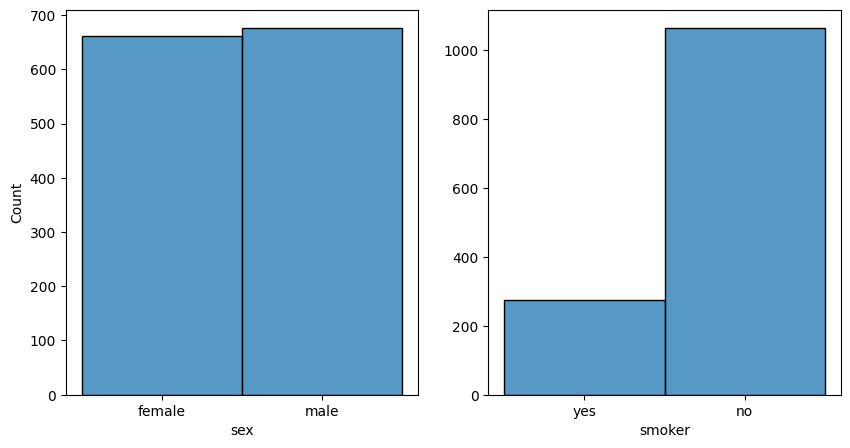

In [9]:
#Analysis of univariate (categorical) variables
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 2, figsize = (10, 5))

# Create histograms
sns.histplot(ax=axis[0], data=data, x='sex')
sns.histplot(ax=axis[1], data=data, x='smoker').set(ylabel=None)

# Show plot
plt.show()

From the histograms we can see that the sex is divided into male and female almost in the same proportions; as for smokers, they represent almost 25% of the sample.

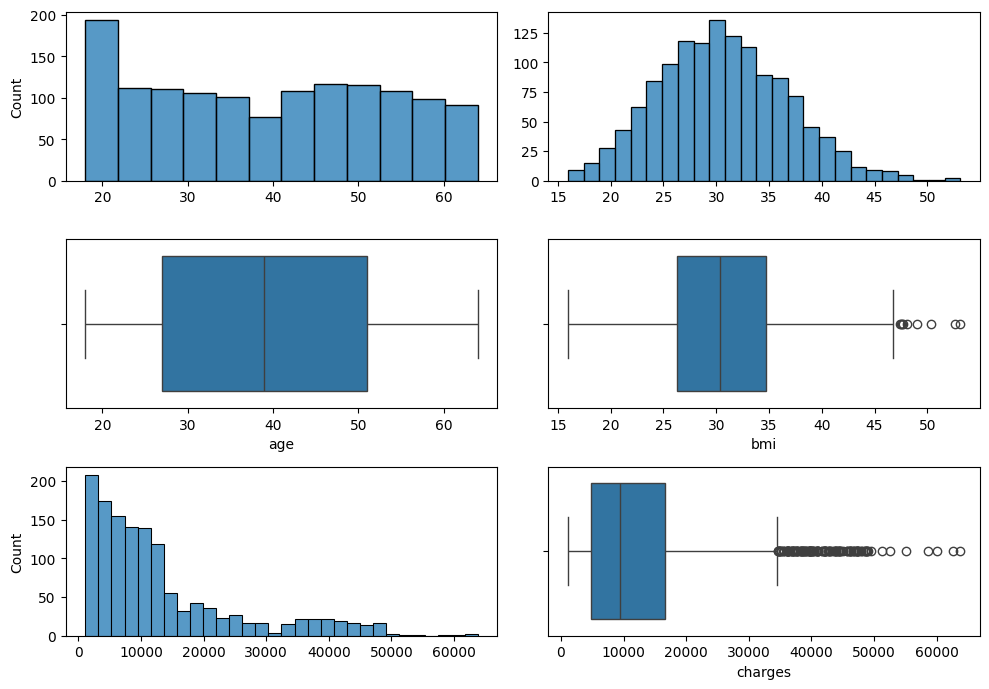

In [12]:
#Analysis on numeric variables
fig, axis = plt.subplots(3, 2, figsize = (10, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "age")
sns.histplot(ax = axis[0, 1], data = data, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "bmi")
sns.histplot(ax = axis[2, 0], data = data, x = "charges").set(xlabel = None)
sns.boxplot(ax = axis[2, 1], data = data, x = "charges")


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

The graphs above reveal that charges and bmi have outliers

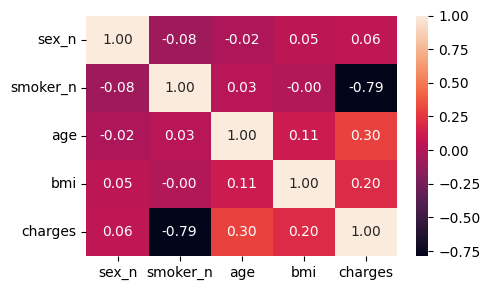

In [18]:
# Numerical-categorical analysis (complete)
# Factorizing (convert categorical values into numerical labels) values:
data["sex_n"] = pd.factorize(data["sex"])[0]
data["smoker_n"] = pd.factorize(data["smoker"])[0]


num_variables = ["sex_n", "smoker_n", "age", "bmi", "charges"]

fig, axis = plt.subplots(figsize = (5, 3))

sns.heatmap(data[num_variables].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

There is a strong negative relationship between smoker_n and charges, which is logical because when the insured person smokes the insurance is more expensive. On the other hand, there is a positive relationship between age and charges that is obvious, the older the insured the high he/she is charged for insurance.

In [19]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])
data_scal = pd.DataFrame(scal_features, index = data.index, columns = num_variables)
data_scal.head()

,sex_n,smoker_n,age,bmi,charges
0,0.0,0.0,0.021739,0.321227,0.251611
1,1.0,1.0,0.000000,0.479150,0.009636
2,1.0,1.0,0.217391,0.458434,0.053115
3,1.0,1.0,0.326087,0.181464,0.333010
4,1.0,1.0,0.304348,0.347592,0.043816


In [20]:
#Feature selection
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split

# Dividing the dataset into training and test samples
X = data_scal.drop("charges", axis = 1)
y = data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Selecting the 3 best features (independant variables)
selection_model = SelectKBest(f_classif, k = 3)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,smoker_n,age,bmi
0,1.0,0.608696,0.107345
1,1.0,0.630435,0.224913
2,1.0,0.739130,0.239440
3,1.0,0.456522,0.493947
4,1.0,0.782609,0.148238


In [21]:
X_test_sel.head()

,smoker_n,age,bmi
0,1.0,0.586957,0.247915
1,1.0,0.391304,0.378262
2,0.0,1.000000,0.293920
3,1.0,0.608696,0.263250
4,0.0,0.021739,0.429379


In [22]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)
X_train_sel.to_csv("/workspaces/Liutciia-linear-regression/data/processed/medical_insurance_cost_data_train.csv", index=False)
X_test_sel.to_csv("/workspaces/Liutciia-linear-regression/data/processed/medical_insurance_cost-data_test.csv", index=False)

In [24]:
#Step 3: LINEAR REGRESSION (Multiple linear regression)
#Reading the processed dataset
import pandas as pd

train_data = pd.read_csv("../data/processed/medical_insurance_cost_data_train.csv")
test_data = pd.read_csv("../data/processed/medical_insurance_cost-data_test.csv")

train_data.head()

,smoker_n,age,bmi,charges
0,1.0,0.608696,0.107345,0.128845
1,1.0,0.630435,0.224913,0.118324
2,1.0,0.739130,0.239440,0.414952
3,1.0,0.456522,0.493947,0.119316
4,1.0,0.782609,0.148238,0.181225


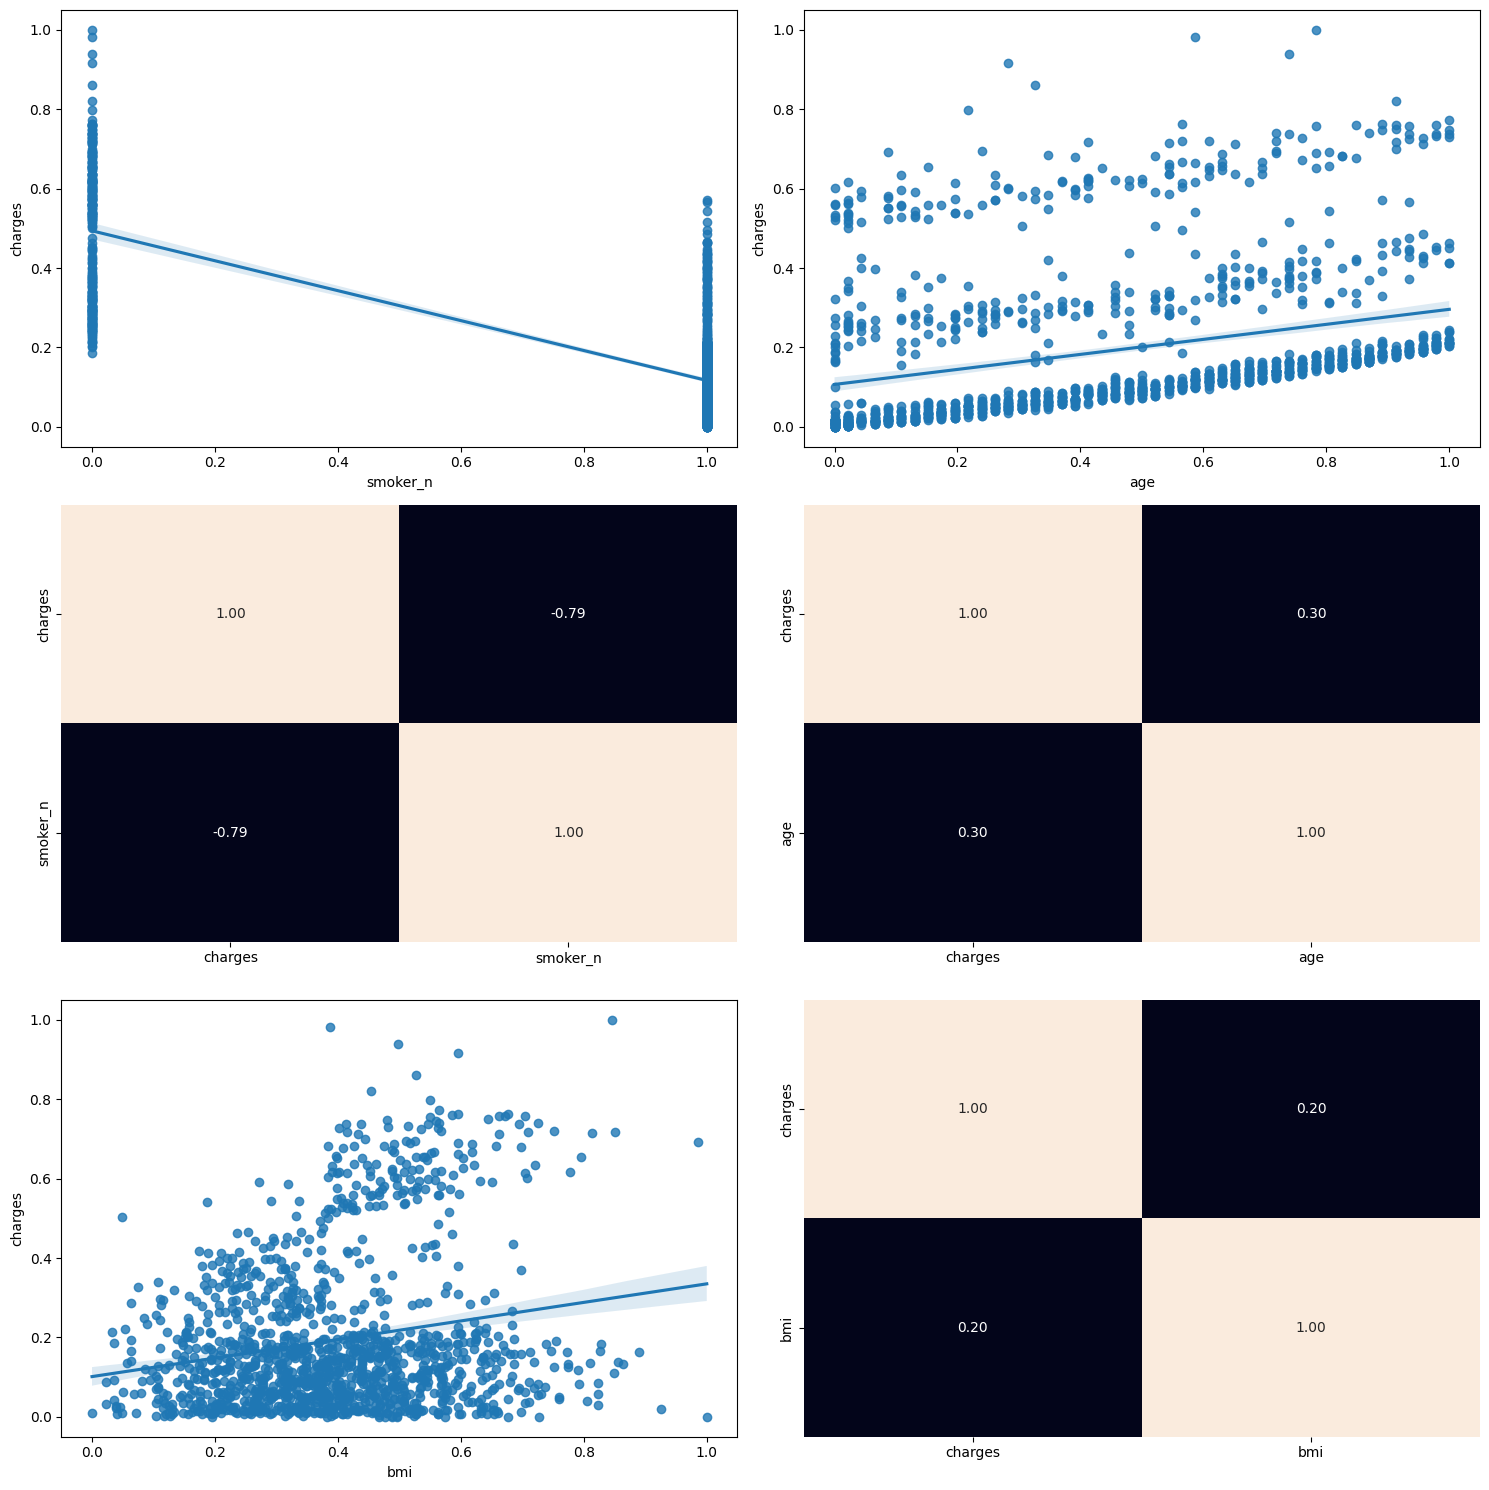

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 2, figsize = (15, 15))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0, 0], data = total_data, x = "smoker_n", y = "charges")
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[2, 0], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 1], cbar = False)


plt.tight_layout()

plt.show()

There is a clear linear relationship between the predictor variables such as smoker, age, bmi and the target variable. Although the correlation with age and bmi variables is lower. 

In [26]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [27]:
#Step 2: Initialization and training of the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2, b3): {model.coef_}")

Intercept (a): 0.33081729171367547
Coefficients (b1, b2, b3): [-0.37790771  0.19047318  0.19368612]


In [29]:
#Step 3: Model prediction
y_pred = model.predict(X_test)
y_pred

array([ 0.11272674,  0.10070667,  0.57821866,  0.11983763,  0.41812267,
        0.15954056, -0.00879279,  0.25773417,  0.00124718,  0.14760566,
        0.42448525,  0.12438044,  0.06948097,  0.58427098,  0.63478961,
        0.57064281,  0.220505  ,  0.55860582,  0.13184857,  0.49126352,
        0.02326852,  0.14313563,  0.03229452,  0.09372443,  0.14877621,
        0.18910043,  0.22655494,  0.06542029,  0.1284336 ,  0.02679898,
        0.11351776,  0.19706734,  0.06386832,  0.0233894 ,  0.05919524,
        0.18896102,  0.01973269,  0.12906642,  0.5141742 ,  0.50560642,
        0.02291504,  0.04966696,  0.21363962,  0.17218193,  0.11814249,
        0.182812  ,  0.0574069 ,  0.02535285,  0.5386038 ,  0.12361761,
        0.24523008,  0.02278665,  0.17667288,  0.00587755,  0.2065008 ,
        0.16956738,  0.05210101,  0.48068205,  0.20785186,  0.18792987,
        0.2217814 ,  0.14412406,  0.23590648,  0.09931453,  0.17141346,
        0.0462947 ,  0.39399283,  0.14809505,  0.01605154,  0.09

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 0.008793436717604542
Coefficient of determination: 0.7776932310583375


A low MSE indicates that the model provides a good fit to the data, effectively capturing the relationship between the independent variables and the dependent variable. This is reflected in a high coefficient of determination (R-squared), which indicates how well the model fits the observed data points.
In summary, the regression model is performing well and making accurate predictions. 


Step 4: Optimization of results
This type of model cannot be optimized due to the absence of hyperparameters